In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm
import seaborn as sns

# 몬테카를로 시뮬레이션을 사용하여 원의 면적 계산하기
링크 : https://signature95.tistory.com/53

100%|██████████| 5000000/5000000 [00:52<00:00, 95802.69it/s] 


π 값 3.1423632


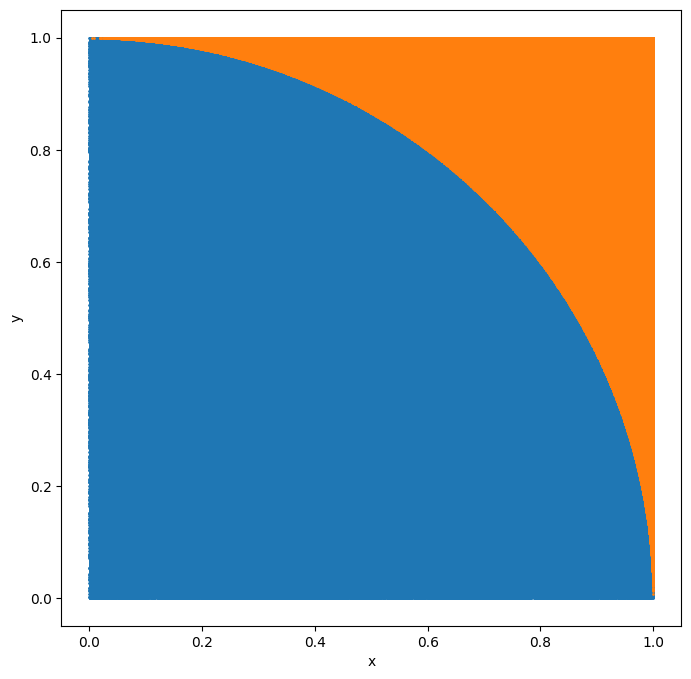

In [ ]:
# 변수 설정
n = 5000000
count = 0
x_list_under = []
y_list_under = []
x_list_upper = []
y_list_upper = []

for i in tqdm(range(n)):
    # 시드 부여 (난수)
    np.random.seed(i)
    # 0,1 사이의 난수 값 생성
    x = np.random.random()
    y = np.random.random()
    # 원 내부에 있는 점을 만족하는 경우, 그렇지 않은 경우 분리
    if (x**2 + y**2) <= 1:
        count += 1
        x_list_under.append(x)
        y_list_under.append(y)
    else:
        x_list_upper.append(x)
        y_list_upper.append(y)

# 원 내부일 확률은 원 넓이의 1/4 이므로 곱하기 4로 π 계산
print('\u03C0 값', 4*count/n)

under = pd.DataFrame(zip(x_list_under,y_list_under), columns=['x_under', 'y_under'])
upper = pd.DataFrame(zip(x_list_upper,y_list_upper), columns=['x_upper', 'y_upper'])

plt.figure(figsize=(8,8))
plt.scatter(under['x_under'], under['y_under'], s=1)
plt.scatter(upper['x_upper'], upper['y_upper'], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#  BLUE (Best Lenear Unbiased Estimator)의 특성을 몬테카를로 시뮬레이션으로 증명하기

In [ ]:
# 임의의 모수와 샘플에 대해 값을 설정합니다. (임의의 모수로 b1 = 10, b2 = 0.5)

# 시드 부여
np.random.seed(2022)

# 임의의 모수 값 지정
N = 100
beta_0 = 10
beta_1 = 0.5

# 샘플 데이터 형성
x = np.arange(start = 0, stop = N + 1, step = 1)
resid = np.random.normal(loc = 0, scale = 7, size = len(x))
y_hat = beta_0 + beta_1 * x + resid
y = beta_0 + beta_1 * x

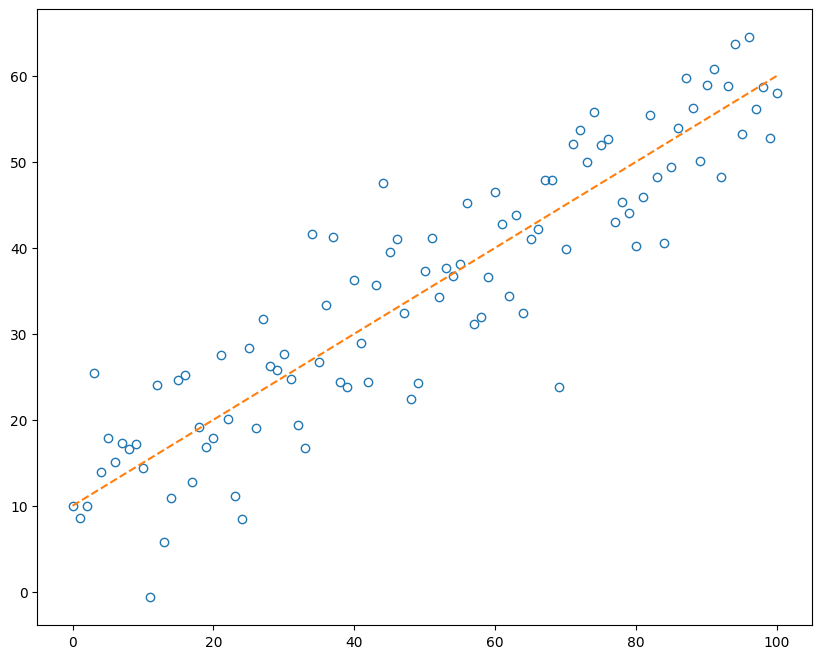

In [ ]:
# y, y_hat을 도표로 시각화 - 모회귀선을 기준으로 잔차가 분포하는 것 확인
plt.figure(figsize = (10, 8))
plt.plot(x, y_hat, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.plot(x, y, linestyle = "dashed")
plt.show()

In [ ]:
# 회귀 분석 시행
model = sm.OLS(y_hat, sm.add_constant(x)).fit()
print(model.summary())
print(f'상수항(beta_0)의 추정 값 : {model.params[0]}')
print(f'회귀계수(beta_1)의 추정 값 : {model.params[1]}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     445.0
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           2.07e-38
Time:                        05:00:57   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8020      1.324      8.161      0.0

위의 결과와 같이 난수를 생성하여 상수항과 회귀계수를 구할 수 있었다.
그렇다면, 이런 과정을 수만번 시행하게 된다면, 모수의 값인 10, 0.5가 도출될 수 있는지 몬테카를로 방법을 시행해 보겠다.

In [ ]:
# 회귀계수 추정값 리스트 생성
beta_0_list = []
beta_1_list = []

# 몬테카를로 시뮬레이션 시행횟수 지정 (10만회)
simulation = 100000

# 임의의 모수 값 지정
beta_0 = 10
beta_1 = 0.5

# sample 데이터 개수 설정 -> 각 시뮬레이션마다 생성된 25개의 y_hat 값으로 회귀 계수 값 추정한다.
N = 25

for i in tqdm(range(simulation)):
    # 시드 부여
    np.random.seed(i)

    # 샘플 데이터 형성
    x = np.arange(start = 0, stop = N + 1, step = 1)
    resid = np.random.normal(loc = 0, scale = 7, size = len(x))
    y_hat = beta_0 + beta_1 * x + resid

    # 회귀 분석 시행
    model = sm.OLS(y_hat, sm.add_constant(x)).fit()

    # 회귀계수 추정치 리스트에 추가
    beta_0_list.append(model.params[0])
    beta_1_list.append(model.params[1])

print(f'상수항(beta_0)의 추정 값 : {np.mean(beta_0_list)}')
print(f'회귀계수(beta_1)의 추정 값 : {np.mean(beta_1_list)}')

100%|██████████| 100000/100000 [00:50<00:00, 1961.92it/s]


상수항(beta_0)의 추정 값 : 9.989879731745281


<ipython-input-7-fc293ba0ebe0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beta_0_list, label='$\hat\u03B2_0$')


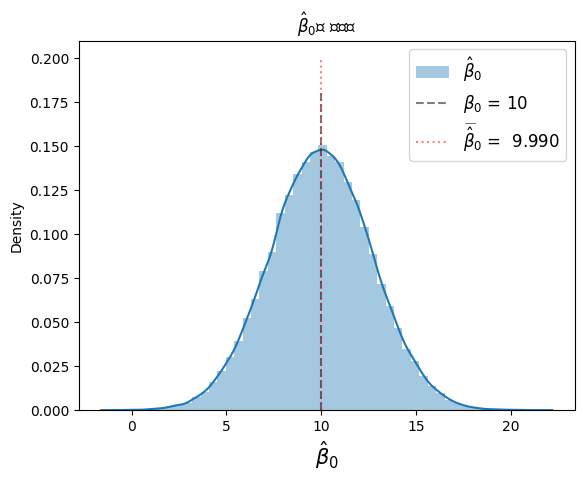

<ipython-input-7-fc293ba0ebe0>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beta_1_list, label='$\hat\u03B2_1$')


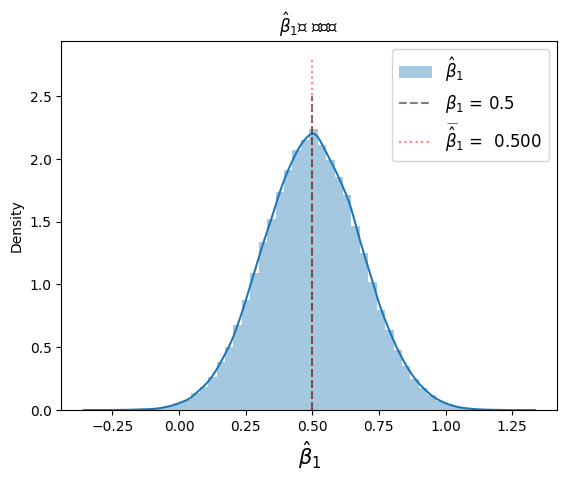

In [ ]:
# 도출한 회귀계수 시각화

# beta_0 시각화

sns.distplot(beta_0_list, label='$\hat\u03B2_0$')
plt.vlines(x=beta_0, ymin=0, ymax=0.18, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_0$ = {beta_0}')
plt.vlines(x=np.mean(beta_0_list), ymin=0, ymax=0.20, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_0$ = {np.mean(beta_0_list) : .3f}')
plt.title(r'$\hat \beta_{0}$의 분포도')
plt.xlabel(r'$\hat \beta_{0}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

# beta_1 시각화

sns.distplot(beta_1_list, label='$\hat\u03B2_1$')
plt.vlines(x=beta_1, ymin=0, ymax=2.5, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_1$ = {beta_1}')
plt.vlines(x=np.mean(beta_1_list), ymin=0, ymax=2.8, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_1$ = {np.mean(beta_1_list) : .3f}')
plt.title(r'$\hat \beta_{1}$의 분포도')
plt.xlabel(r'$\hat \beta_{1}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

위와 같이 모수에 가깝게 추정되고 있는 것을 알 수 있다.